In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)
np.random.seed(42)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score

In [7]:
housing = pd.read_csv('/mnt/New_Volume/Work From Home/Croma Campus/05312021/09_30_11_00_05312021/housing.csv')

In [8]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
housing.shape

(20640, 10)

In [11]:
housing.shape[1:]

(10,)

In [12]:
imputer = SimpleImputer(strategy = 'median')

In [13]:
housing_ = pd.DataFrame(imputer.fit_transform(housing.select_dtypes(exclude= 'object')), columns= housing.select_dtypes(exclude= 'object').columns)
housing_.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [14]:
# scaler = MinMaxScaler()
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(housing_),columns = housing_.columns)
x = pd.concat([x,housing[housing.select_dtypes(include = 'object').columns]],axis = 1)
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,NEAR BAY
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,NEAR BAY
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,NEAR BAY
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,NEAR BAY
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,NEAR BAY


In [15]:
y = x['median_house_value']
x = x.drop('median_house_value', axis = 1)

In [16]:
x= pd.get_dummies(x)
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,0,0,0,1,0
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,0,0,0,1,0
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,0,0,0,1,0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,0,0,0,1,0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,0,0,0,1,0


In [13]:
x.isna().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

In [17]:
x_train,x_valid = x[:16000],x[16000:]
y_train,y_valid = y[:16000],y[16000:]

In [18]:
keras.backend.clear_session()

In [19]:
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape = x.shape[1:]),
    keras.layers.Dense(100, activation = 'relu'),
    # keras.layers.BatchNormalization(),
    keras.layers.Dense(1)
])

In [20]:
# loss = keras.losses.mean_squared_error
# optimizer = keras.optimizers.SGD()
model.compile(optimizer='sgd', loss = 'mae')

In [31]:
history = model.fit(x_train,y_train, validation_data=(x_valid,y_valid), epochs=10, callbacks= keras.callbacks.ModelCheckpoint('checkpoint.h5'))

Epoch 1/10
500/500 [==============================] - 1s 2ms/step - loss: 0.3442 - val_loss: 0.3950
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: 0.3420 - val_loss: 0.3987
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 0.3410 - val_loss: 0.4003
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 0.3390 - val_loss: 0.3948
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 0.3377 - val_loss: 0.3972
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 0.3360 - val_loss: 0.3966
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: 0.3349 - val_loss: 0.3966
Epoch 8/10
500/500 [==============================] - 1s 2ms/step - loss: 0.3333 - val_loss: 0.4038
Epoch 9/10
500/500 [==============================] - 1s 2ms/step - loss: 0.3321 - val_loss: 0.4150
Epoch 10/10
500/500 [==============================] - 1s 2ms/step - loss: 0.3312 - val_loss: 0.4018

In [29]:
model = keras.models.load_model('/mnt/New_Volume/Work From Home/Croma Campus/06012021/09_30_11_00_06012021/checkpoint.h5')

In [19]:
from sklearn.metrics import r2_score

In [20]:
y_pred = model.predict(x_train)
score = r2_score(y_train, y_pred)
score

0.7080346964523567

In [21]:
y_pred_val = model.predict(x_valid)
score_val= r2_score(y_valid, y_pred_val)
score_val

0.7069270161800558

In [22]:
model.evaluate(x_valid,y_valid)

145/145 [==============================] - 0s 1ms/step - loss: 0.3982


0.39818963408470154

In [40]:
model.predict(np.array(x.iloc[1,:]).reshape(-1,13))

array([[2.3683856]], dtype=float32)

In [41]:
y[1]

1.314156136924335

In [42]:
def pow(a):
    def inner(b):
        return b**a
    return inner

In [33]:
import matplotlib.pyplot as plt

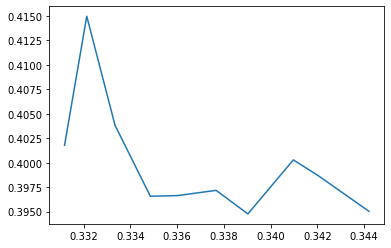

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['loss'],history.history['val_loss'])

In [35]:
history.history

{'loss': [0.34420105814933777,
  0.34202060103416443,
  0.3409682810306549,
  0.33902373909950256,
  0.33766743540763855,
  0.3360145092010498,
  0.33485186100006104,
  0.333341121673584,
  0.33213135600090027,
  0.33118143677711487],
 'val_loss': [0.3950366973876953,
  0.3986962139606476,
  0.4002828896045685,
  0.3947671055793762,
  0.3971741199493408,
  0.39663922786712646,
  0.3965708911418915,
  0.4038192927837372,
  0.41495513916015625,
  0.4017692804336548]}